In [1]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 8AD1-7C86

 Directory of c:\Users\norbe\Downloads\binus assignment laptop code\MachineLearning\titanicData

27/04/2024  12:58    <DIR>          .
27/04/2024  12:58    <DIR>          ..
19/02/2024  09:52            60,302 titanic.csv
30/04/2024  10:00           203,587 titanicpred.ipynb
               2 File(s)        263,889 bytes
               2 Dir(s)  339,746,127,872 bytes free


In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import sklearn as sk;

In [3]:
dataset = pd.read_csv('titanic.csv');

In [4]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
dataset['PassengerId'].duplicated().any()

False

In [8]:
dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
dataset['Survived'].unique()

array([0, 1], dtype=int64)

<Axes: ylabel='count'>

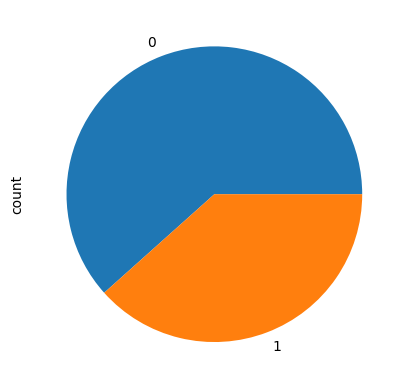

In [10]:
dataset['Survived'].value_counts().plot.pie()

<Axes: ylabel='count'>

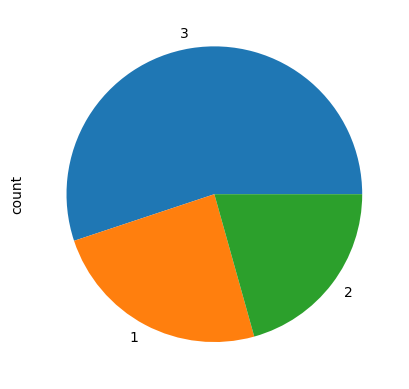

In [11]:
dataset['Pclass'].value_counts().plot.pie()

<Axes: xlabel='Pclass', ylabel='Survived'>

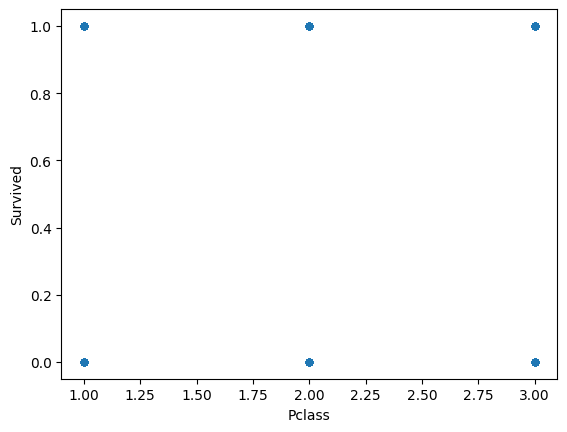

In [12]:
dataset[['Pclass','Survived']].plot.scatter(x='Pclass',y='Survived')

In [13]:
dataset[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


<Axes: >

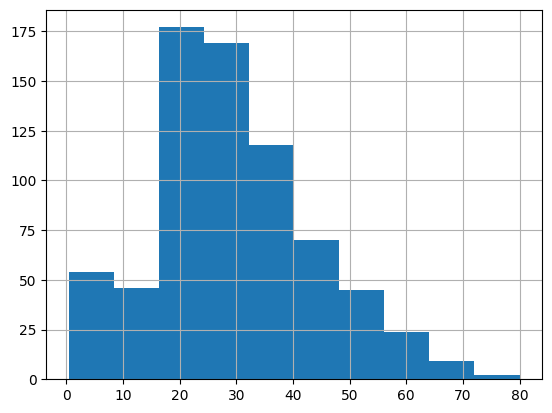

In [14]:
dataset.Age.hist()

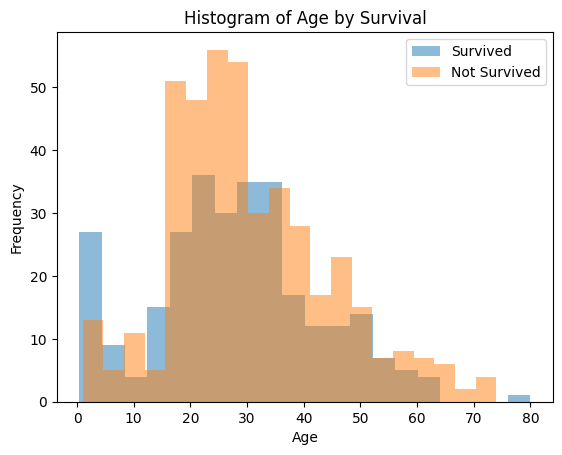

In [15]:
# Assuming 'dataset' is your DataFrame and it has columns 'Age' and 'Survived'

# Filter the dataset into two subsets
survived = dataset[dataset['Survived'] == 1]
not_survived = dataset[dataset['Survived'] == 0]

# Plot histograms
plt.hist(survived['Age'], bins=20, alpha=0.5, label='Survived')
plt.hist(not_survived['Age'], bins=20, alpha=0.5, label='Not Survived')

# Add legend
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Survival')

# Show the plot
plt.show()

In [16]:
dataset.pivot(columns='Survived').Age

Survived,0,1
0,22.0,NaN
1,NaN,38.0
2,NaN,26.0
3,NaN,35.0
4,35.0,NaN
...,...,...
886,27.0,NaN
887,NaN,19.0
888,NaN,NaN
889,NaN,26.0


<Axes: ylabel='Frequency'>

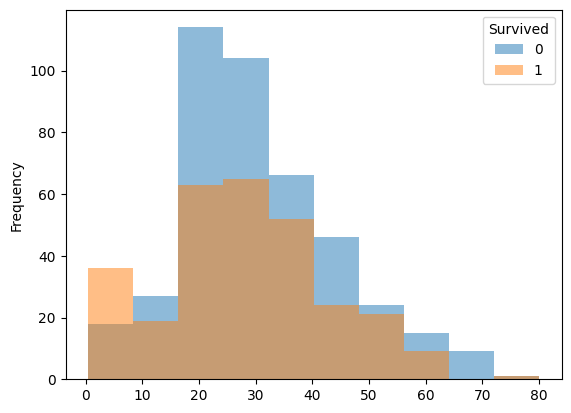

In [41]:
dataset.pivot(columns='Survived').Age.plot(kind = 'hist', alpha = 0.5)

In [18]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
dataset.describe(include=['object', 'bool'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [21]:
dataset['Sex'] = dataset['Sex'].apply(lambda x: 0 if "female" in x else 1)
# dataset['Sex'] = dataset['Sex'].apply(lambda x: 1 if (x=='male') else 0)

In [22]:
dataset['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [23]:
dataset.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
def encode_embarked(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2
    else:
        return -1

In [25]:
dataset['Embarked'] = dataset['Embarked'].apply(encode_embarked)

In [26]:
dataset['Embarked'].value_counts()

Embarked
 0    644
 1    168
 2     77
-1      2
Name: count, dtype: int64

In [27]:
dataset['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [28]:
# sk.preprocessing.LabelEncoder().fit_transform(dataset['Cabin'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Cabin'] = le.fit_transform(dataset['Cabin'])

In [29]:
dataset['Cabin'].value_counts()

Cabin
147    687
63       4
145      4
47       4
62       3
      ... 
124      1
76       1
72       1
125      1
60       1
Name: count, Length: 148, dtype: int64

In [30]:
dataset = dataset.drop(columns = ['Ticket'])

In [31]:
dataset.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,130.744108,0.359147
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,36.024237,0.638707
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,147.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,147.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,147.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,2.000000


In [32]:
dataset = pd.read_csv('titanic.csv');

male --> 1

female --> 2

one hot encoding

         x0-x1
male --> 0  1

female > 1  0

In [33]:
pd.get_dummies(dataset['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [34]:
dataset.drop(columns = ['Sex'])
dataset.join(pd.get_dummies(dataset['Sex']))
# Note: doesn't work

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False,True


In [35]:
dataset = pd.read_csv('titanic.csv');

<Axes: >

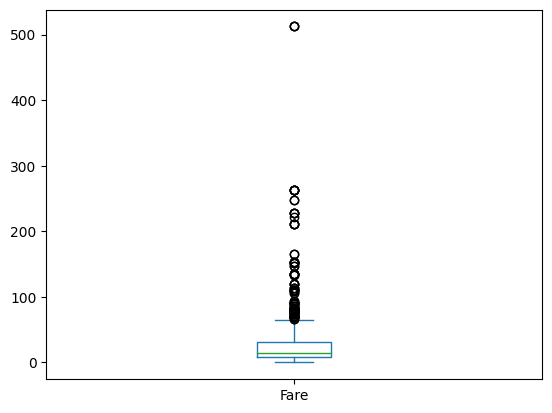

In [36]:
dataset.Fare.plot.box()

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset['Fare'] = scaler.fit_transform(dataset['Fare'].values.reshape(-1,1))

<Axes: >

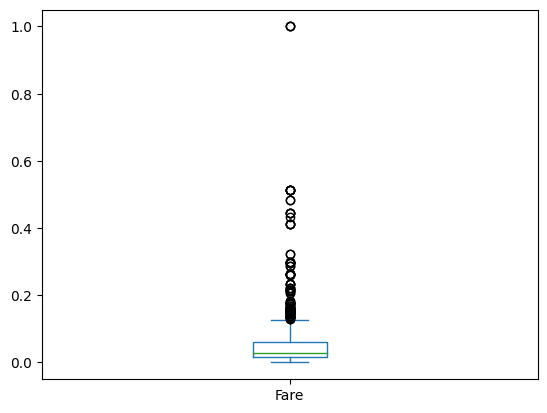

In [38]:
dataset.Fare.plot.box()

In [39]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x+1)

transformer = FunctionTransformer(log_transform)

dataset['Fare'] = transformer.transform(dataset['Fare'])

<Axes: >

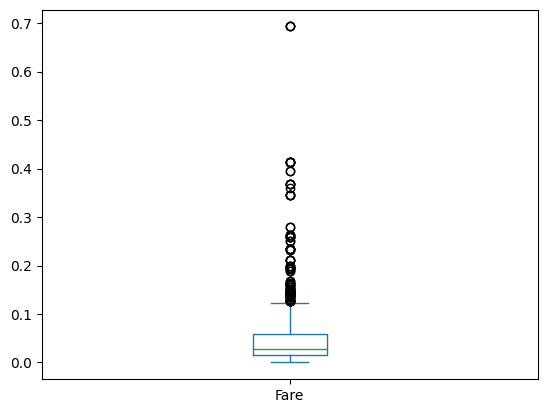

In [40]:
dataset.Fare.plot.box()